Retrait annuel moyen : 15.60 mètres/an
Médiane annuel : 13.37 mètres/an
Écart-type annuel : 8.67 mètres/an
Année 1890 : 2.67 mètres/an
Année 1925 : 6.22 mètres/an
Année 1935 : 27.56 mètres/an
Année 1942 : 15.19 mètres/an
Année 1948 : 12.93 mètres/an
Année 1992 : 13.76 mètres/an
Année 2004 : 9.33 mètres/an
Année 2010 : 12.97 mètres/an
Année 2016 : 28.88 mètres/an
Année 2022 : 26.53 mètres/an


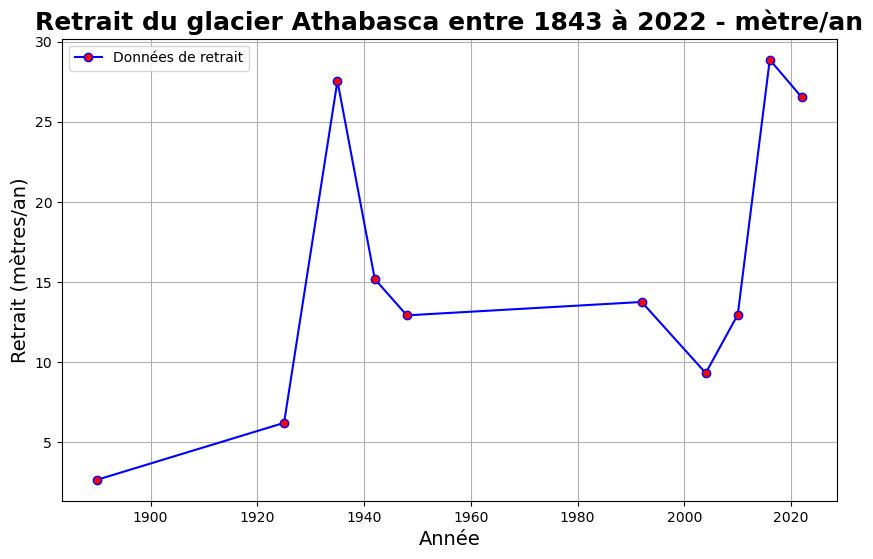

In [35]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gdf = gpd.read_file(r"D:\UQTR\Automne 2024\Ouest\retrait_glacier\retrait_points.shp")
gdf = gdf.to_crs(epsg=32611)
gdf['year'] = pd.to_numeric(gdf['year'], errors='coerce')
gdf = gdf.dropna(subset=['year'])
gdf = gdf[(gdf['year'] >= 1843) & (gdf['year'] <= 2024)]
gdf = gdf.sort_values(by='year').reset_index(drop=True)

years_existing = gdf['year'].values
points_existing = gdf.geometry.values

x_existing = np.array([point.x for point in points_existing])
y_existing = np.array([point.y for point in points_existing])

distances = np.sqrt(np.diff(x_existing)**2 + np.diff(y_existing)**2)
cumulative_distances = np.cumsum(distances)

years_diff = np.diff(years_existing)
retreat_per_year = np.divide(distances, years_diff)

mean_retreat = np.mean(retreat_per_year)
median_retreat = np.median(retreat_per_year)
std_dev_retreat = np.std(retreat_per_year)

print(f"Retrait annuel moyen : {mean_retreat:.2f} mètres/an")
print(f"Médiane annuel : {median_retreat:.2f} mètres/an")
print(f"Écart-type annuel : {std_dev_retreat:.2f} mètres/an")

for year, retreat in zip(years_existing[1:], retreat_per_year):
    print(f"Année {year} : {retreat:.2f} mètres/an")
    
plt.figure(figsize=(10, 6))
plt.plot(years_existing[1:], retreat_per_year, marker='o', linestyle='-', color='blue', markerfacecolor='red', label='Données de retrait')
plt.legend()
plt.title('Retrait du glacier Athabasca entre 1843 à 2022 - mètre/an', fontsize=18, fontweight='bold')
plt.xlabel('Année', fontsize=14)
plt.ylabel('Retrait (mètres/an)', fontsize=14)
plt.grid(True)
plt.show()





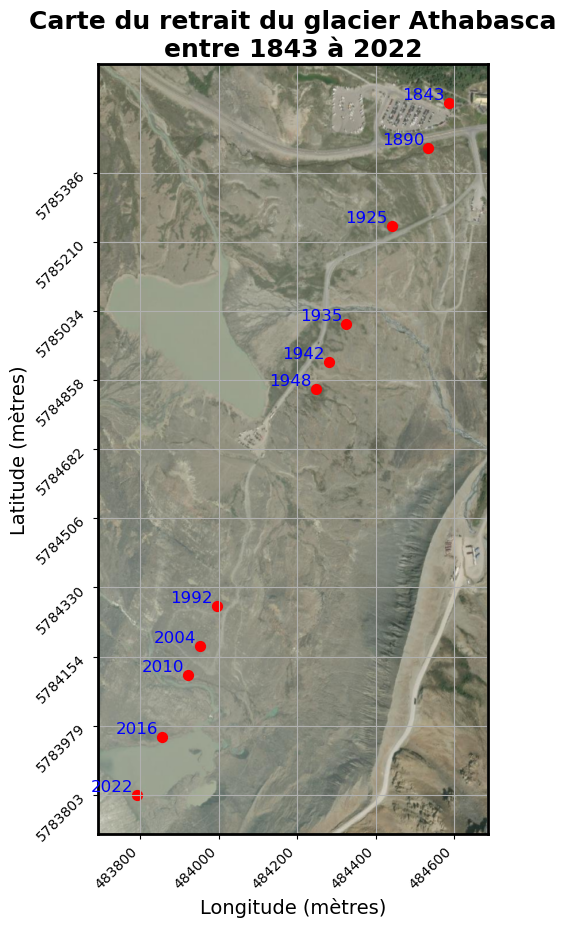

In [32]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx  

fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, marker='o', color='red', markersize=50, label='Points de retrait')

for x, y, label in zip(x_existing, y_existing, years_existing):
    ax.text(x - 10, y + 10, str(label), fontsize=12, ha='right', color='blue')

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, crs=gdf.crs.to_string(), attribution='')

minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx - 100, maxx + 100)
ax.set_ylim(miny - 100, maxy + 100)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.title('Carte du retrait du glacier Athabasca\nentre 1843 à 2022', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Longitude (mètres)', fontsize=14)
plt.ylabel('Latitude (mètres)', fontsize=14)
plt.grid(True)

ax.set_yticks(np.arange(miny, maxy, step=(maxy - miny) / 10))
ax.set_yticklabels(np.arange(miny, maxy, step=(maxy - miny) / 10).astype(int), rotation=45, ha='right', fontsize=10)

plt.savefig('carte_retrait_glacier.png', dpi=300)
plt.show()
